# NBA Trends

In this project, you’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

### Analyzing relationships between Quant and Categorical 

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


(point_diff, the difference between pts and opp_pts)

In [84]:
nba.count()

game_id          24359
year_id          24359
fran_id          24359
opp_fran         24359
game_location    24359
is_playoffs      24359
pts              24359
opp_pts          24359
game_result      24359
forecast         24359
point_diff       24359
dtype: int64

In [7]:
nba.dtypes

game_id           object
year_id            int64
fran_id           object
opp_fran          object
game_location     object
is_playoffs        int64
pts                int64
opp_pts            int64
game_result       object
forecast         float64
point_diff         int64
dtype: object

In [4]:
nba['year_id'].unique()

array([1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015], dtype=int64)

#### The data has been subsetted for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014)

##### 2010 (Knicks Vs Nets)

In [6]:
nba_2010 = nba[nba['year_id'] == 2010]
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [9]:
nba_2010['fran_id'].unique()

array(['Celtics', 'Knicks', 'Nets', 'Thunder', 'Spurs'], dtype=object)

- represent the points each team has scored in their games

In [23]:
knicks_pts = nba_2010.pts[nba_2010['fran_id'] == 'Knicks']
# knicks_pts

In [22]:
nets_pts = nba_2010.pts[nba_2010['fran_id'] == 'Nets']
# nets_pts

- Calculate the difference between the two teams’ average points scored

In [26]:
knicks_pts_mean = np.mean(knicks_pts)
knicks_pts_mean

102.10975609756098

In [28]:
nets_pts_mean = np.mean(nets_pts)
nets_pts_mean

92.3780487804878

In [29]:
diff_mean_2010 = knicks_pts_mean - nets_pts_mean
diff_mean_2010

9.731707317073173

Based on this value highly associated variables tend to have a large mean difference.

- Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets

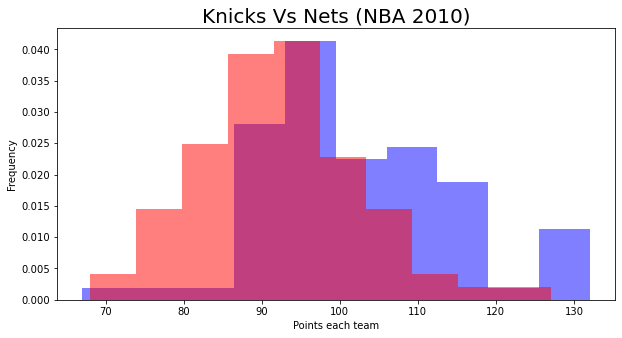

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(10,5))
plt.hist(knicks_pts, color='blue', label='Knicks', density=True, alpha=0.5)
plt.hist(nets_pts, color='red', label='Nets', density=True, alpha=0.5)
plt.xlabel('Points each team')
plt.ylabel('Frequency')
plt.title('Knicks Vs Nets (NBA 2010)', fontsize=20)
plt.show()
plt.clf()

There is still a lot of overlap between the scores, suggesting that the association is relatively weak.

- let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using nba_2014

##### 2014 (Knicks Vs Nets) 

In [38]:
nba_2014 = nba[nba['year_id'] == 2014]
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


In [48]:
nba_2014['fran_id'].unique()

array(['Nets', 'Knicks', 'Spurs', 'Celtics', 'Thunder'], dtype=object)

In [45]:
knicks_pts14 = nba_2014.pts[nba_2014['fran_id'] == 'Knicks']
# knicks_pts14
nets_pts14 = nba_2014.pts[nba_2014['fran_id'] == 'Nets']
# nets_pts14

In [46]:
knicks_pts14_mean = np.mean(knicks_pts14)
knicks_pts14_mean

98.58536585365853

In [47]:
nets_pts14_mean = np.mean(nets_pts14)
nets_pts14_mean

98.13829787234043

In [49]:
diff_mean_2014 = knicks_pts14_mean - nets_pts14_mean
diff_mean_2014

0.44706798131809933

the difference in points get smaller in 2014

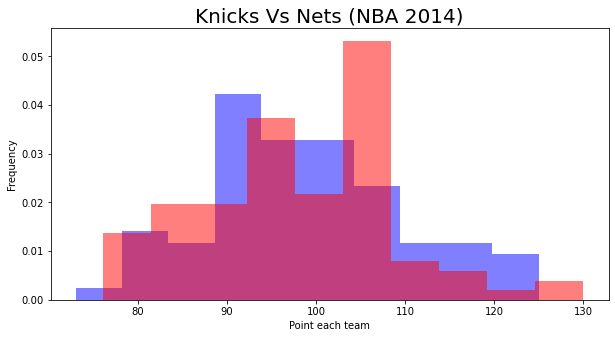

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(10, 5))
plt.hist(knicks_pts14, color='blue', label='Knicks', density=True, alpha=0.5)
plt.hist(nets_pts14, color='red', label='Nets', density=True, alpha=0.5)
plt.xlabel('Point each team')
plt.ylabel('Frequency')
plt.title('Knicks Vs Nets (NBA 2014)', fontsize=20)
plt.show()
plt.clf()

The mean difference that have been calculated doesn't make sense, because there is still a lot of overlap between the scores, suggesting that the association is relatively weak.

##### Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game 

- For the remainder of this project, we’ll focus on data from 2010

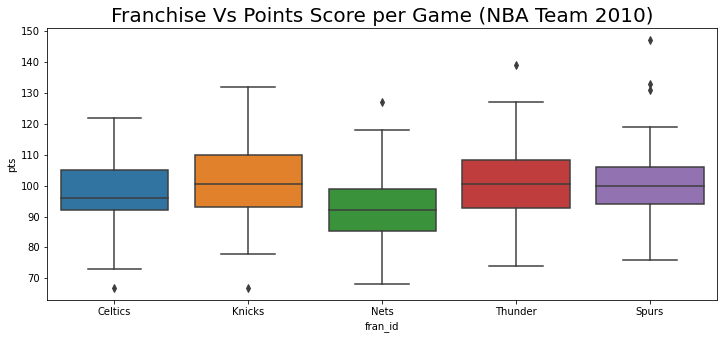

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=nba_2010, x=nba_2010['fran_id'], y=nba_2010['pts'])
plt.title('Franchise Vs Points Score per Game (NBA Team 2010)', fontsize=20)
plt.show()
plt.clf()

Looking at the plot, we can clearly see that there are a lot of overlap between the boxes (i.e from the beginning of pts (70 pts)). Therefore, there are not much associated between fran_id (franchise) and pts (point score per game). The teams have different average per score game Celtics and Nets. 

### Analyzing relationships between Categorical variables 

- calculate a contingency table of frequencies (2010)

In [75]:
location_result_freq = pd.crosstab(nba_2010['game_result'], nba_2010['game_location'])
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


This suggests that the variables are not associated, because we can see while they play away and lose is 133, they play at home and lose is 105, they play away and win is 92, they play home and win 120 (less than play away and lose)

In [77]:
location_result_prop = location_result_freq / len(nba_2010)
location_result_prop

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


- Using the contingency table, calculate the expected contingency table (if there were no association) and the Chi-Square statistic 

In [79]:
chi2, pval, dov, expected = chi2_contingency(location_result_freq)
expected

array([[119., 119.],
       [106., 106.]])

In [80]:
chi2

6.501704455367053

The actual contingency table look different to the expected table. Based on this output, there is an association between these variables, because if there were no association between the game_location and game_result we would expect 119 people to answer no both (133 in the observed table compared to 119 in the expected table). This provides additional evidence that these variables are associated.

### Analyzing Relationships Between Quantitative Variables 

- calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset (2010)

In [85]:
cov_forecast_point = np.cov(nba_2010['forecast'], nba_2010['point_diff'])
cov_forecast_point

array([[5.22668307e-02, 1.37461257e+00],
       [1.37461257e+00, 1.86559287e+02]])

the covariance between these two variables is 1.37 (A positive covariance)

- Calculate the correlation between forecast and point_diff (2010)

In [86]:
corr_forecast_point, p = pearsonr(nba_2010['forecast'], nba_2010['point_diff']) 
corr_forecast_point

0.44020887084680815

This variables do not have a linear association (the value close to 0)

- Generate a scatter plot of forecast (on the x-axis) and point_diff (on the y-axis)

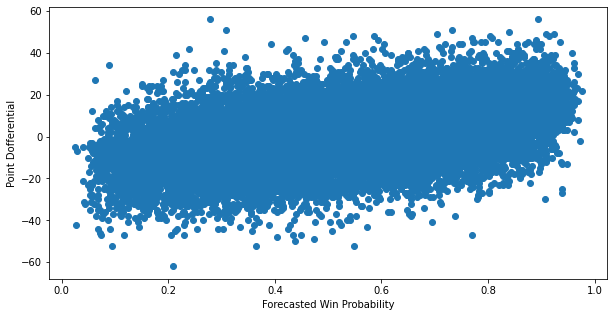

In [93]:
plt.figure(figsize=(10, 5))
plt.scatter(x=nba['forecast'], y=nba['point_diff'])
plt.xlabel('Forecasted Win Probability')
plt.ylabel('Point Dofferential')
plt.show()

Does the correlation value make sense?